#感知机模型我们如果用数学公式来表示他实际上就是权重w和输入向量x的一个点乘，即：
![感知机](./img.png)

第一个：输入部分；

第二个：权重（就是w向量）；权重是在我们进行训练期间计算的值，初始呢我们是用一些初始值来可以进行随机的初始化，然后在学习过程当中对他们进行更新，最后我们模型学习完之后，这就是我们学习到的参数向量。我们用w来表示。

第三个：偏置；这个偏置对应到上图在输入里边我们有一个常量1，实际上这个常量1就相当于乘以1，实际上就是，，后边的计算是和输入是无关的，相当于就是一个偏置，相当于i从1开始一直到n，还加上一个，这就是一个偏置。


![感知机模型](img_1.png)

第四个：加权；

第五个：输出；

感知机学习的目标是求得一个能够将训练数据集正实例点和负实例点完全正确分开的分离超平面。如果是非线性可分的数据，则最后无法获得超平面。

In [35]:
import pandas as pd  #数据分析库
import numpy as np  #数值计算扩展，用来存储和处理大型矩阵
import matplotlib.pyplot as plt  #导入画图工具包
from sklearn.datasets import load_iris
import torch.nn as nn
from sklearn.model_selection import train_test_split

从机器学习包中导入load_iris数据集
ris数据集的中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set
iris包含150个样本，对应数据集的每行数据
每行数据包含每个样本的四个特征(花萼长度、花萼宽度、花瓣长度、花瓣宽度)和样本的类别信息(targe)
iris数据集是一个150行5列的二维表




In [36]:
iris = load_iris()  #导入数据
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
dataframe = dataframe[:100]
print(dataframe)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
..                ...               ...                ...               ...
95                5.7               3.0                4.2               1.2
96                5.7               2.9                4.2               1.3
97                6.2               2.9                4.3               1.3
98                5.1               2.5                3.0               1.1
99                5.7               2.8                4.1               1.3

[100 rows x 4 columns]


将iris中前100个的每个样本的四个特征(花萼长度、花萼宽度、花瓣长度、花瓣宽度)放入dataframe矩阵中
DataFrame介绍：https://www.jianshu.com/p/8024ceef4fe2

In [37]:
dataframe['label'] = iris.target[:100]
print(dataframe.columns)
dataframe.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
print(dataframe)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')
    sepal length  sepal width  petal length  petal width  label
0            5.1          3.5           1.4          0.2      0
1            4.9          3.0           1.4          0.2      0
2            4.7          3.2           1.3          0.2      0
3            4.6          3.1           1.5          0.2      0
4            5.0          3.6           1.4          0.2      0
..           ...          ...           ...          ...    ...
95           5.7          3.0           4.2          1.2      1
96           5.7          2.9           4.2          1.3      1
97           6.2          2.9           4.3          1.3      1
98           5.1          2.5           3.0          1.1      1
99           5.7          2.8           4.1          1.3      1

[100 rows x 5 columns]


将样本的真实类别记录在dataframe的label下
对dataframe的标签名字进行格式统一

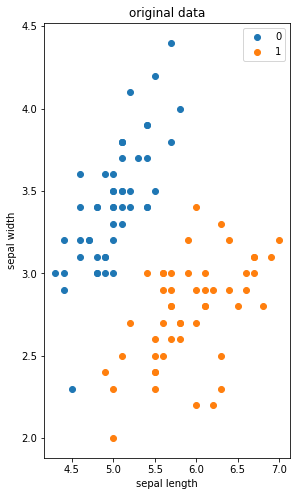

In [38]:
plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.scatter(dataframe[:50]['sepal length'], dataframe[:50]['sepal width'], label='0')
plt.scatter(dataframe[50:100]['sepal length'], dataframe[50:100]['sepal width'], label='1')
#subplot绘制多个子图
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('original data')
plt.legend()
plt.show()

In [91]:


data = np.array(dataframe.iloc[:, [0, 1, -1]])
# print(data)
x_data, y_data = data[:, :-1], data[:, -1]
#令X等于'sepal length','sepal width'的100个二维数据，令y等于100个类别（只有-1,1）
y_data = np.array([1 if i == 1 else -1 for i in y_data])

# print(x_data)
# print(y_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)

(80, 2) (80,)


In [97]:
class Perceptron:
    def __init__(self,n_iter=20,eta=0.1):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.learning_rate = eta
        self.epochs=n_iter
        self.errors_ = []
        #ones在这生成一个比data列数少1的数组，此处data[0]表示data的第1行，len表示长度
        #选取w,b和学习率l_rate的初值

    def sign(self, x, w, b):
        """
        感知机公式
        :param x: 输入
        :param w: 权重
        :param b: 偏置
        :return: 输出超平面划分
        """
        y = np.dot(x, w) + b
        return y
    def step(self, z):
        """阶跃函数。对净输入进行转换。

        Parameter:
        -----
        z: 标量或数组类型
            净输入。

        Return:
        ------
        t: 变量或数组类型。
            分类的结果。-1或者1。当z >= 0时，返回1，否则返回-1。
        """
        return np.where(z >= 0, 1, -1)


    def fit(self, x_train, y_train):
       for i in range(self.epochs):
            wrong_count = 0
            for d in range(len(x_train)):
                x = x_train[d]
                y = y_train[d]#实际类别
                y_hat=self.step(self.sign(x, self.w, self.b))#感知机的划分
                if y * y_hat <= 0:#类别不一样
                    self.w = self.w + self.learning_rate * np.dot(y-y_hat, x)  # 调整权重
                    self.b = self.b + self.learning_rate * (y-y_hat ) # 调整偏置
                    wrong_count += 1
            self.errors_.append(wrong_count)
       return 'Perceptron Model!'

    def predict(self, x):
        """预测方法。根据提供的数据集X，返回每一个样本对应的标签（分类）。

        Parameter:
        -----
        X: 类数组类型。形状为 (样本数量, 特征数量)
            提供预测集。

        Return：
        -----
        label: 类数组类型。形状为：(样本数量,)
            预测的每一个便签分类。
        """
        x_pred = np.asarray(x)
        # 计算净输入。(矢量化计算，没有使用循环分别对每一个样本求净输出)
        z = np.dot(x_pred, self.w) + self.b
        # 获取最终的分类结果。（一维数组类型。）
        result = self.step(z)
        return result



In [98]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

'Perceptron Model!'

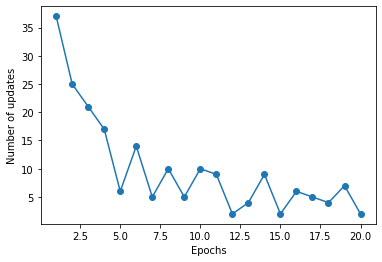

In [99]:
#出图看一眼错误数目
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

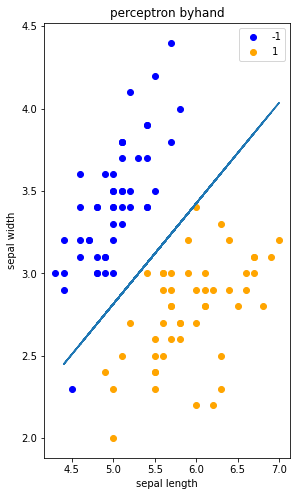

In [102]:
plt.figure(figsize=(15, 8))
x_points=x_train[:,0]
#从4到7之间创建10个等差序列，包括7
#linspace的用法:https://blog.csdn.net/weixin_40103118/article/details/78787454
y= -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.subplot(132)
plt.plot(x_points, y)
plt.scatter(data[:50, 0], data[:50, 1], color='blue', label='-1')
plt.scatter(data[50:100, 0], data[50:100, 1], color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('perceptron byhand')
plt.legend()
plt.show()


sklearn 实现感知机

[[ 30.2 -48. ]]
[-9.]


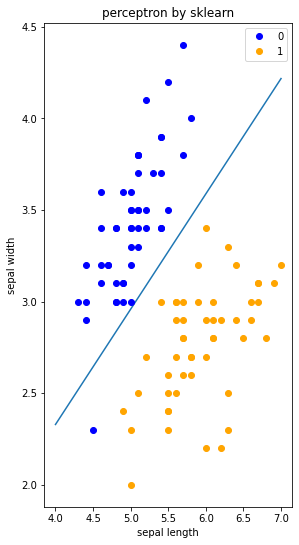

In [108]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
#fit_intercept表示是否保留截距
clf.fit(x_train, y_train)

print(clf.coef_)
#输出系数w
print(clf.intercept_)
#输出截距b
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
#根据上面的结果得到了方程，画图时根据w1x1+w2x2+b=0进行画图
#由于画图时是二维的，这里的横轴x表示x1即第一个特征，纵轴y表示x2即第二个特征
plt.figure(figsize=(15, 8))
plt.subplot(133)
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('perceptron by sklearn')
plt.legend()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
#调整子图间距
plt.savefig("demo.jpg")
plt.show()


pytorch 实现感知机

In [156]:
import torch
import torch.nn as nn
import torch.functional as F
y_data = np.array([1 if i == 1 else 0 for i in y_data])

# print(x_data)
# print(y_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [157]:
class Perceptron2(nn.Module):
    def __init__(self):
        super(Perceptron2, self).__init__()
        self.perceptron=nn.Linear(2,2)



    def forward(self, x):
        output = self.perceptron(x)
        output=torch.sigmoid(output)
        return output    # return x for visualization


perceptron=Perceptron2()
print(perceptron)  # net architecture
EPOCH = 10              # train the training data n times, to save time, we just train 1 epoch
LR = 0.001
optimizer = torch.optim.Adam(perceptron.parameters(), lr=LR)   # optimize all logistic parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted


Perceptron2(
  (perceptron): Linear(in_features=2, out_features=2, bias=True)
)


In [167]:
for epoch in range(EPOCH):

        # print(b_x.size())
       # b_x = b_x.view(-1, 28*28)
        # print(b_x.size())
        b_x=torch.Tensor(x_train)
        b_y=torch.tensor(y_train,dtype=torch.long)
        output = perceptron(b_x)              # logistic output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients


test_output= perceptron(torch.tensor(x_test,dtype=torch.float32))
pred_y = torch.max(test_output,1 )
print(pred_y, 'prediction number')
print(y_test, 'real number')

torch.return_types.max(
values=tensor([0.8909, 0.9454, 0.8820, 0.9204, 0.9445, 0.9054, 0.9071, 0.9339, 0.9452,
        0.9156, 0.9247, 0.9284, 0.9286, 0.8712, 0.8909, 0.8806, 0.8913, 0.8886,
        0.9144, 0.8696], grad_fn=<MaxBackward0>),
indices=tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])) prediction number
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0] real number


In [186]:
correct = 0
total = 0
with torch.no_grad():
        x_test=torch.Tensor(x_test)
        outputs = perceptron(x_test)
        labels=torch.Tensor(y_test)
        _,predicted = torch.max(outputs.data, 1)
        print(predicted)
        total=labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 20 test : %d %%' % (
    100 * correct / total))

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
Accuracy of the network on the 20 test : 100 %
